In [101]:
#ライブラリの読み込み
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet,fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
from collections import defaultdict

In [92]:
#データセットの読み込み
cust_df=pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")

In [93]:
cust_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [94]:
# 個人顧客のデータのみ取り出す
datas=cust_df[cust_df["Channel"]==2]
#必要なカラムのみ抽出
datas=datas[["Fresh","Frozen","Delicassen"]]

In [95]:
#基本統計量の表示
datas.describe()

,Fresh,Frozen,Delicassen
count,142.000000,142.000000,142.000000
mean,8904.323944,1652.612676,1753.436620
std,8987.714750,1812.803662,1953.797047
min,18.000000,33.000000,3.000000
25%,2347.750000,534.250000,566.750000
50%,5993.500000,1081.000000,1350.000000
75%,12229.750000,2146.750000,2156.000000
max,44466.000000,11559.000000,16523.000000


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [80.0, 80.0, 103.75, 103.75],
  [65.0, 65.0, 91.875, 91.875],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [78.4375, 78.4375, 143.75, 143.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [240.0, 240.0, 270.0, 270.0],
  [202.5, 202.5, 255.0, 255.0],
  [185.0, 185.0, 228.75, 228.75],
  [175.0, 175.0, 206.875, 206.875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [292.5, 292.5, 320.0, 320.0],
  [190.9375, 190.9375, 306.25, 306.25],
  [111.09375, 111.09375, 248.59375, 248.59375],
  [33.75, 33.75, 1

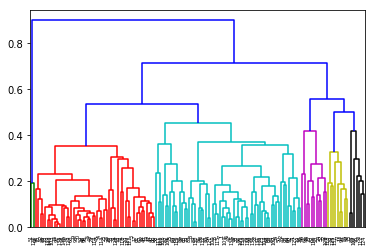

In [156]:
# 階層的クラスタリング
# 結果の作成　Bray-Curtis距離を用いて群平均法でクラスター間の距離を算出
#pdistを使用する
S=pdist(datas,metric="braycurtis")
result=linkage(S,method="average")
dendrogram(result,color_threshold=0.5)

In [157]:
#閾値を決めてクラスター分割
cluster_result = fcluster(result, t=0.5, criterion="distance")
d = defaultdict(list)
for i, r in enumerate(cluster_result):
    d[r].append(i)
for k, v in d.items():
    print(k, v)


2 [0, 3, 4, 5, 9, 10, 11, 12, 14, 15, 16, 17, 18, 21, 23, 25, 28, 29, 31, 36, 40, 41, 43, 45, 46, 47, 48, 52, 59, 60, 61, 62, 70, 85, 90, 91, 96, 97, 98, 103, 113, 114, 116, 117, 122, 128, 129, 138, 139, 140, 141]
3 [1, 2, 6, 7, 8, 19, 22, 26, 27, 30, 33, 34, 35, 37, 38, 42, 49, 50, 54, 56, 58, 63, 64, 65, 67, 68, 69, 71, 75, 76, 79, 80, 81, 83, 84, 86, 87, 89, 92, 93, 99, 100, 101, 102, 104, 105, 106, 109, 111, 115, 119, 120, 121, 123, 127, 130, 131, 132, 133, 134, 135, 136]
5 [13, 39, 55, 57, 77, 94, 118, 125, 137]
4 [20, 24, 32, 44, 66, 72, 74, 78, 82, 108, 110]
1 [51, 126]
6 [53, 73, 88, 95, 107, 112, 124]


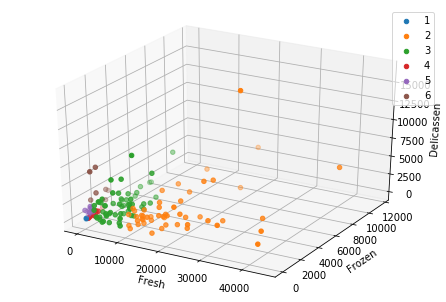

In [161]:
#各パラメータデータに入れる
X=datas["Fresh"].tolist()
Y=datas["Frozen"].tolist()
Z=datas["Delicassen"].tolist()

# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("Fresh")
ax.set_ylabel("Frozen")
ax.set_zlabel("Delicassen")
#ax.set_xlim(0,20000)
#ax.set_zlim(0,7500)

#各クラスターに対して散布図の描画
for key in sorted(d):
    values=d[key]
    x=[X[value] for value in values]
    y=[Y[value] for value in values]
    z=[Z[value] for value in values]
    ax.scatter(x,y,z,label=str(key))
plt.legend()
plt.show()
        

In [87]:
#各距離算出法でのコーフェン相関係数を算出するプログラム
def clustering_score(datas):
    methods = ["single", "complete", "average", "weighted",
               "centroid", "median", "ward"]
    for method in methods:
        S = pdist(datas,metric="braycurtis")
        Z = linkage(S, method=method)
        c, d = cophenet(Z, S)
        print("{0} {1:.3f}".format(method, c))

In [88]:
clustering_score(datas)

single 0.644
complete 0.682
average 0.783
weighted 0.702
centroid 0.791
median 0.663
ward 0.638


In [163]:
#非階層クラスタリング
# クラスタリングのためnp.arrayに変換
non_hierarchical_datas=datas
non_hierarchical_array=np.array([non_hierarchical_datas["Fresh"].tolist(),
                                non_hierarchical_datas["Frozen"].tolist(),
                                non_hierarchical_datas["Delicassen"].tolist()])
non_hierarchical_array=non_hierarchical_array.T

In [165]:
# クラスタ分析実行(n=4,6)
pred_4=KMeans(n_clusters=4).fit_predict(non_hierarchical_array)
pred_6=KMeans(n_clusters=6).fit_predict(non_hierarchical_array)

In [169]:
non_hierarchical_datas["cluster_4"]=pred_4
non_hierarchical_datas["cluster_6"]=pred_6

In [170]:
non_hierarchical_datas

,Fresh,Frozen,Delicassen,cluster_4,cluster_6
0,12669,214,1338,0,3
1,7057,1762,1776,0,5
2,6353,2405,7844,0,5
4,22615,3915,5185,1,4
5,9413,666,1451,0,3
...,...,...,...,...,...
418,660,133,776,2,0
421,17063,1031,1784,1,1
423,17565,1059,668,1,1
424,16980,874,249,1,1


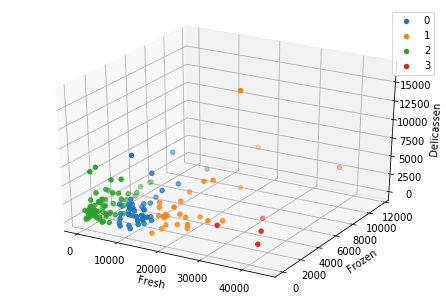

In [171]:
#k-means法でのクラスター分布の描画(n=4)
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("Fresh")
ax.set_ylabel("Frozen")
ax.set_zlabel("Delicassen")
#ax.set_xlim(0,20000)
#ax.set_zlim(0,7500)

for i in range(4):
    datas=non_hierarchical_datas[non_hierarchical_datas["cluster_4"]==i]
    #各パラメータデータに入れる
    X=datas["Fresh"].tolist()
    Y=datas["Frozen"].tolist()
    Z=datas["Delicassen"].tolist()
    ax.scatter(X,Y,Z,label=str(i))

plt.legend()
plt.show()

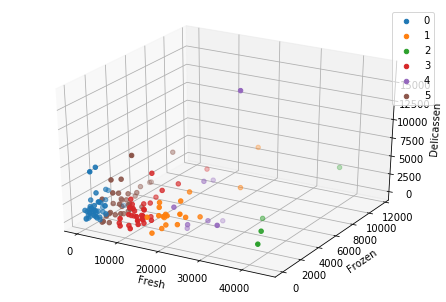

In [172]:
#k-means法でのクラスター分布の描画(n=6)
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("Fresh")
ax.set_ylabel("Frozen")
ax.set_zlabel("Delicassen")
#ax.set_xlim(0,20000)
#ax.set_zlim(0,7500)

for i in range(6):
    datas=non_hierarchical_datas[non_hierarchical_datas["cluster_6"]==i]
    #各パラメータデータに入れる
    X=datas["Fresh"].tolist()
    Y=datas["Frozen"].tolist()
    Z=datas["Delicassen"].tolist()
    ax.scatter(X,Y,Z,label=str(i))

plt.legend()
plt.show()